In [206]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import lightgbm as lgb
import xgboost as xgb
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df

,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Hsize,Vehicles,Income,...,Cost,Safety,Environment,Health,Weather,Parking,Car_freq,Bus_freq,Walk_freq,Distance
0,0,1,0,0,0,0,0,4,3,4,...,3,2,4,5,3,4,1,4,5,8.00
1,0,1,0,0,0,0,0,3,1,4,...,4,4,2,2,2,3,1,5,3,7.60
2,1,1,0,0,0,0,0,3,1,0,...,5,3,2,1,4,2,1,5,4,6.60
3,0,1,1,0,0,1,0,3,2,4,...,5,5,2,3,5,5,4,1,3,19.60
4,1,1,0,0,0,0,0,4,1,4,...,5,5,5,4,5,1,1,2,5,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0,0,0,0,0,0,3,0,0,...,2,2,3,4,4,2,2,2,4,0.75
253,1,1,0,0,0,0,0,2,0,0,...,3,3,4,5,5,3,2,3,5,1.00
254,0,0,0,0,0,0,0,4,1,0,...,3,3,4,5,5,3,2,2,4,1.30
255,1,0,0,0,0,0,0,3,1,0,...,3,3,3,4,5,3,2,2,4,0.90


In [7]:
drops = ["Mode", "Car_freq", "Bus_freq", "Walk_freq"]
X = df.drop(drops, axis=1)

<Axes: >

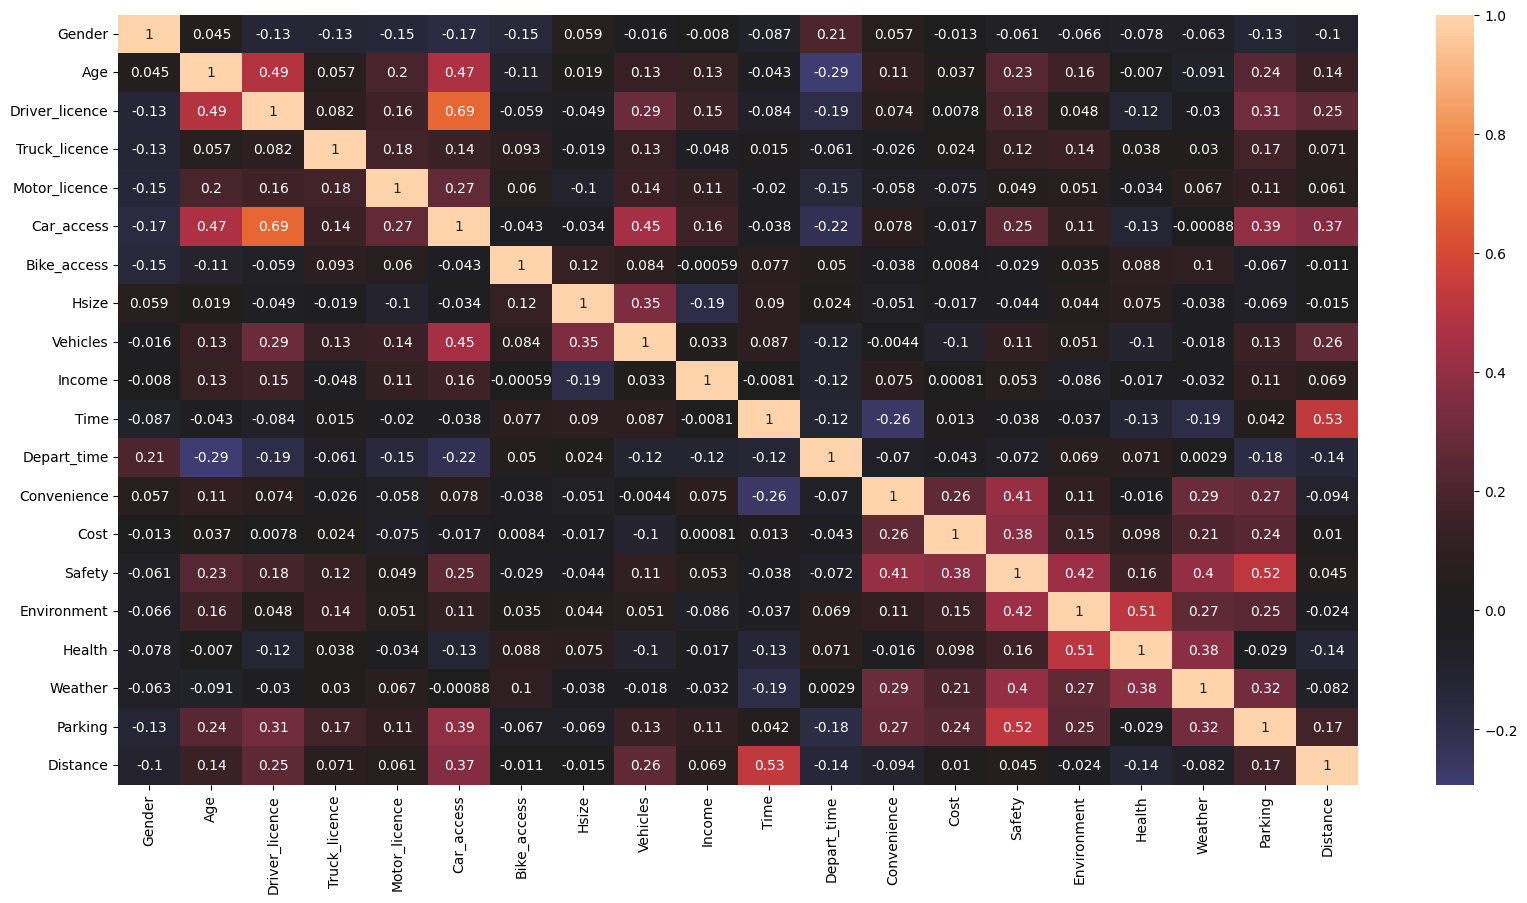

In [8]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [64]:
drops = ["Mode", "Driver_licence", "Car_freq", "Bus_freq", "Walk_freq", "Car_access", "Vehicles"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [65]:
X

,Gender,Age,Truck_licence,Motor_licence,Bike_access,Hsize,Income,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,0,1,0,0,0,4,4,60,3,1,3,2,4,5,3,4,8.00
1,0,1,0,0,0,3,4,40,2,4,4,4,2,2,2,3,7.60
2,1,1,0,0,0,3,0,35,2,4,5,3,2,1,4,2,6.60
3,0,1,0,0,0,3,4,46,2,5,5,5,2,3,5,5,19.60
4,1,1,0,0,0,4,4,5,3,5,5,5,5,4,5,1,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0,0,0,0,3,0,10,4,2,2,2,3,4,4,2,0.75
253,1,1,0,0,0,2,0,15,5,3,3,3,4,5,5,3,1.00
254,0,0,0,0,0,4,0,18,4,3,3,3,4,5,5,3,1.30
255,1,0,0,0,0,3,0,10,4,3,3,3,3,4,5,3,0.90


In [66]:
X, y = shuffle(X, y, random_state=42)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    80
1    64
2    61
Name: count, dtype: int64

Class counts in y_test:
Mode
0    20
2    16
1    16
Name: count, dtype: int64


# Logistic Regression

In [70]:
log_reg=LogisticRegression(random_state=42)

In [71]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg'],
              'max_iter': [100, 200, 300, 400]}

In [72]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [73]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [74]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'liblinear'}


In [75]:
logreg_model=LogisticRegression(C=100, max_iter=100, solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      1.00      0.97        16
           2       0.94      0.94      0.94        16

    accuracy                           0.94        52
   macro avg       0.94      0.95      0.94        52
weighted avg       0.94      0.94      0.94        52



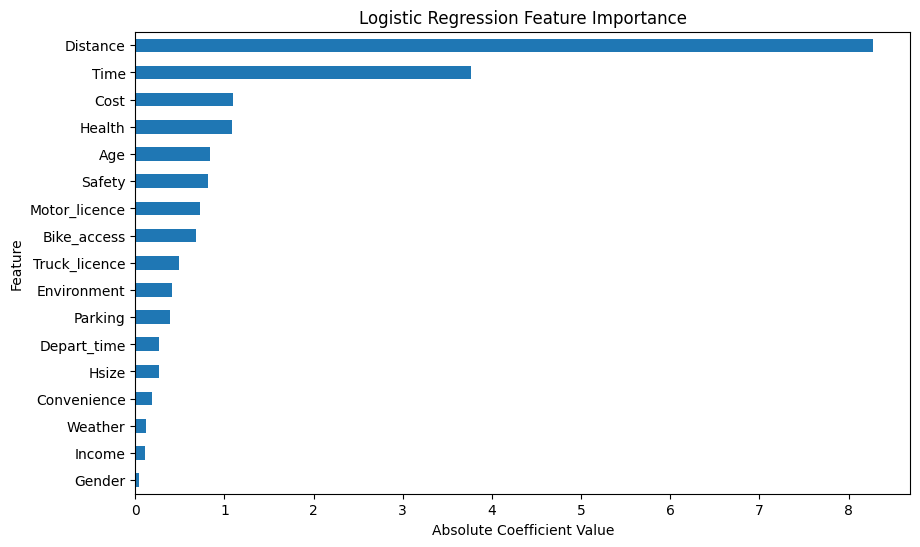

In [76]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [77]:
print(sorted_coefficients)

Gender           0.039359
Income           0.104697
Weather          0.114650
Convenience      0.190095
Hsize            0.263335
Depart_time      0.264747
Parking          0.389107
Environment      0.416507
Truck_licence    0.485235
Bike_access      0.682803
Motor_licence    0.727794
Safety           0.814282
Age              0.836351
Health           1.088127
Cost             1.093910
Time             3.769097
Distance         8.277333
dtype: float64


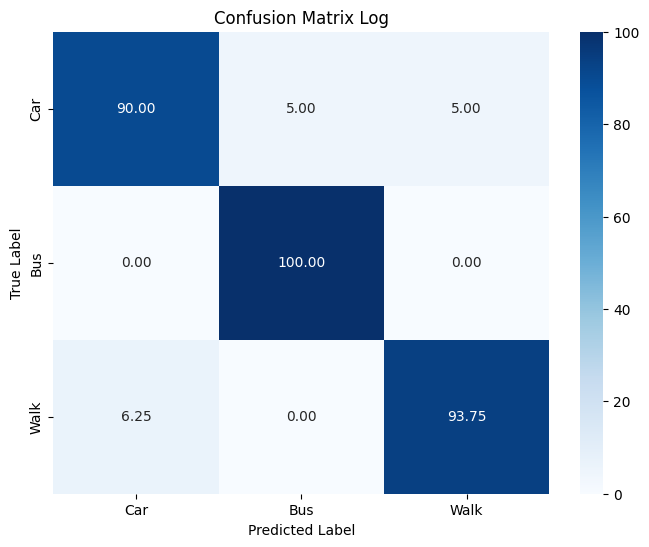

In [80]:
class_labels = ["Car", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Log')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

In [81]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

8

In [82]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.67      0.88      0.76        16
           2       0.94      0.94      0.94        16

    accuracy                           0.83        52
   macro avg       0.85      0.84      0.83        52
weighted avg       0.85      0.83      0.83        52



In [83]:
param_grid = {
    'max_depth': list(range(2, 9))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

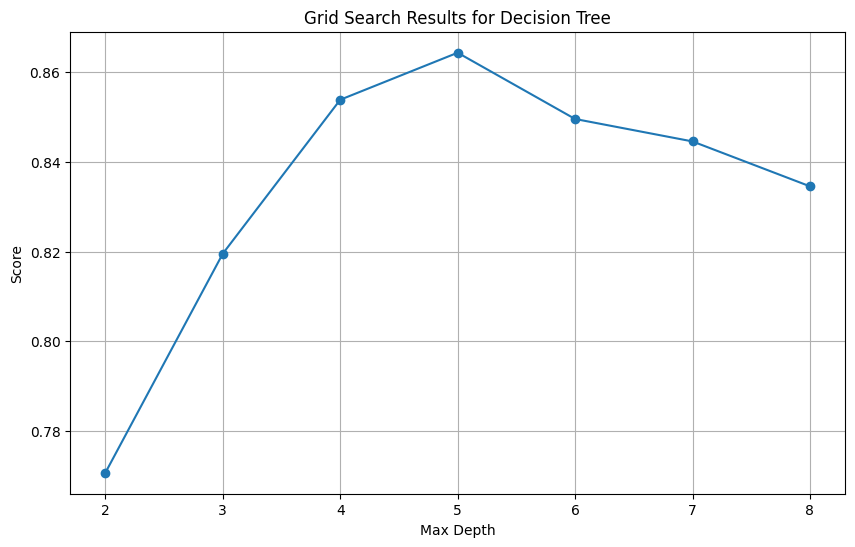

In [84]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [94]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=7)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.74      0.88      0.80        16
           2       1.00      0.94      0.97        16

    accuracy                           0.87        52
   macro avg       0.88      0.87      0.87        52
weighted avg       0.88      0.87      0.87        52



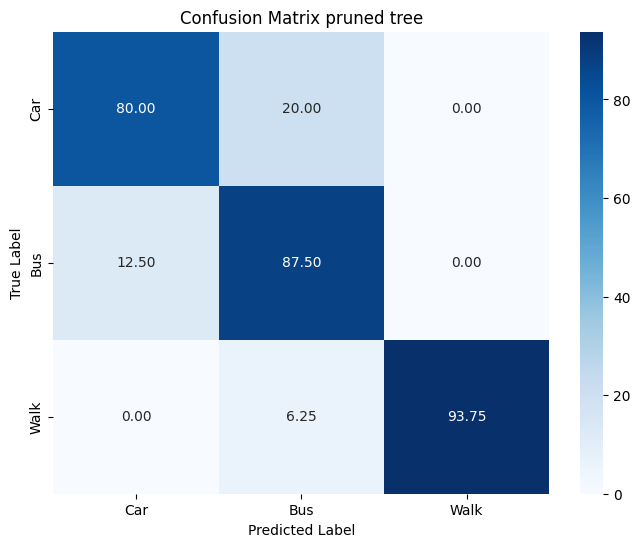

In [95]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [96]:
X.columns

Index(['Gender', 'Age', 'Truck_licence', 'Motor_licence', 'Bike_access',
       'Hsize', 'Income', 'Time', 'Depart_time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking', 'Distance'],
      dtype='object')

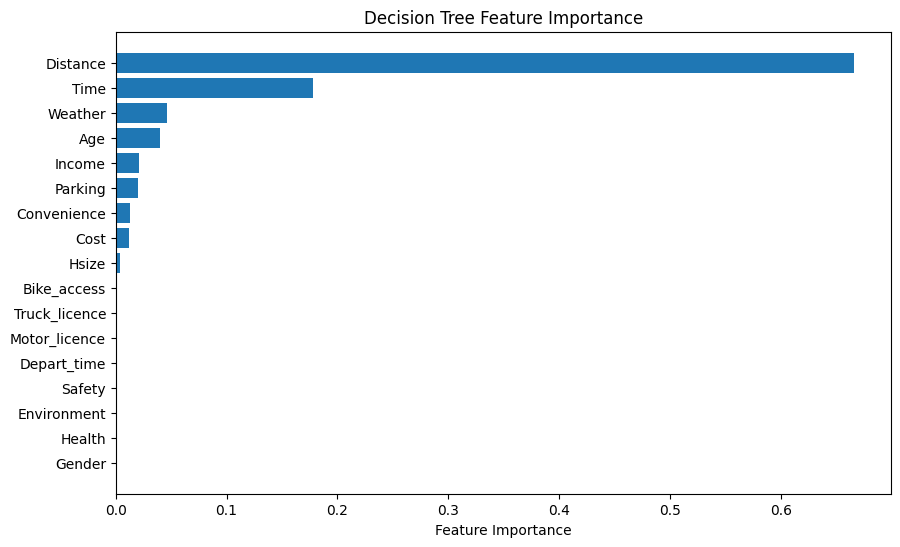

In [97]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Age', 'Truck_licence', 'Motor_licence', 'Bike_access',
       'Hsize', 'Income', 'Time', 'Depart_time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking', 'Distance']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

# Bagging 

In [100]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier)

In [103]:
param_grid = {
    'n_estimators': list(range(51, 400))}

In [104]:
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'n_estimators': [51, 52, 53, 54, 55, 56, 57, 58, 59,
                                          60, 61, 62, 63, 64, 65, 66, 67, 68,
                                          69, 70, 71, 72, 73, 74, 75, 76, 77,
                                          78, 79, 80, ...]},
             scoring='accuracy')

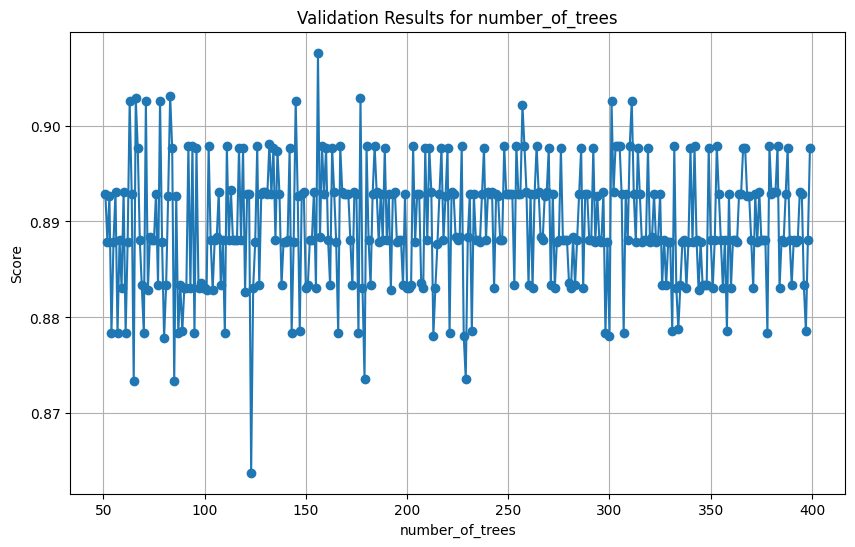

In [105]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [106]:
params = grid_search.best_params_
params

{'n_estimators': 156}

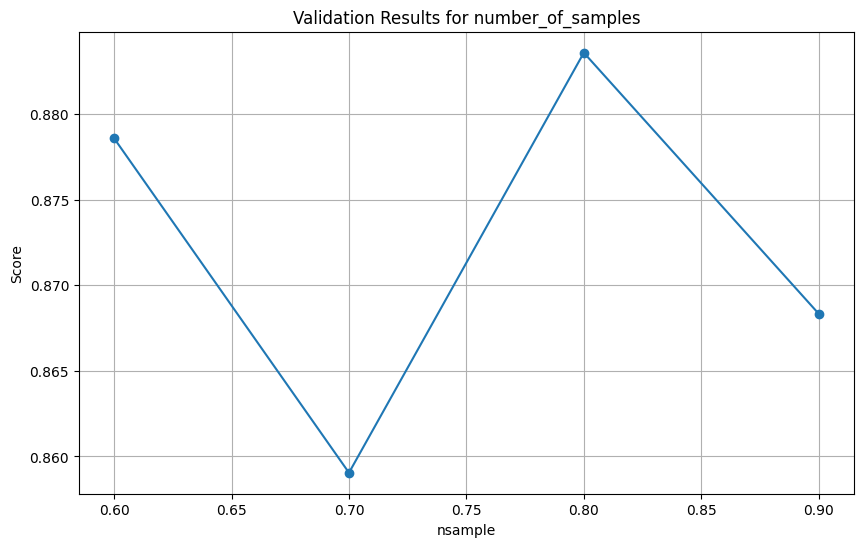

In [107]:
param_grid = {
    'max_samples': [0.6, 0.7,0.8,0.9]}
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
sample = grid_search.cv_results_['param_max_samples']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(sample, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('nsample')
plt.ylabel('Score')
plt.title('Validation Results for number_of_samples')
plt.grid(True)
plt.show()

In [110]:
param_grid = {
    'max_samples': [0.6, 0.8],
    'n_estimators': [156]}

In [111]:
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params_bag = grid_search.best_params_
print(best_params_bag)

{'max_samples': 0.8, 'n_estimators': 156}


In [112]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, max_samples=0.8, n_estimators=156)
bagging_classifier.fit(X_train, y_train)
y_pred_bag=bagging_classifier.predict(X_test)
bagreport = classification_report(y_test, y_pred_bag)
print(bagreport)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.76      1.00      0.86        16
           2       1.00      0.94      0.97        16

    accuracy                           0.90        52
   macro avg       0.92      0.91      0.91        52
weighted avg       0.93      0.90      0.91        52



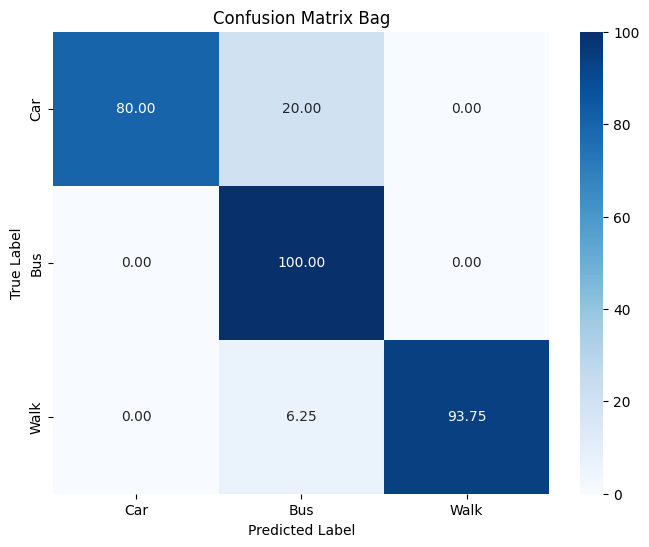

In [113]:
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_bag) / conf_matrix_bag.sum(axis=1)
conf_matrix_percentages_bag = (conf_matrix_bag.T / conf_matrix_bag.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_bag, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Bag')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [114]:
X.shape

(257, 17)

In [115]:
param_grid = {
    'max_features': range(2, 18)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 15}


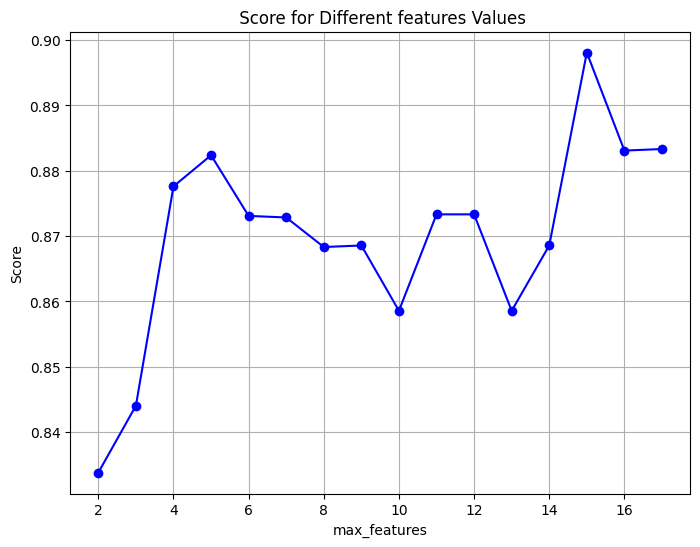

In [116]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [118]:
param_grid = {
    'n_estimators': list(range(51, 400))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 94}


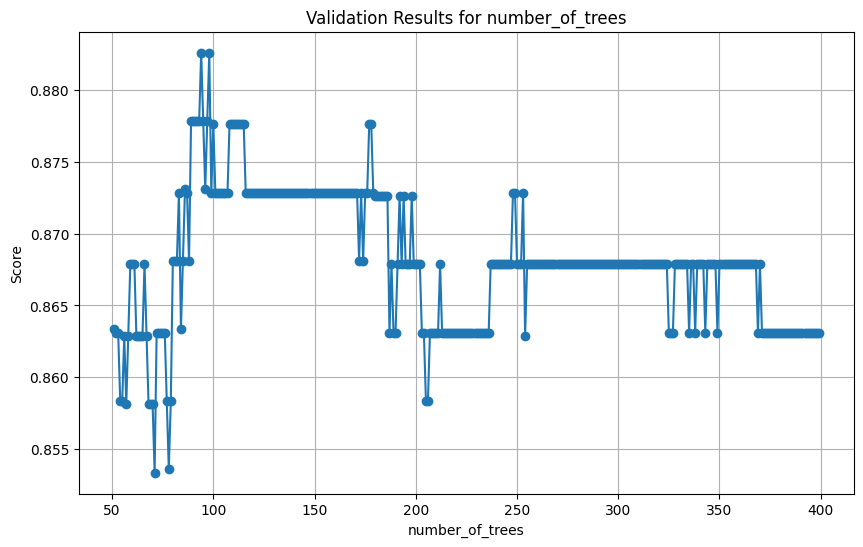

In [119]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [121]:
param_grid = {
    'n_estimators': list(range(80, 100)),
    'max_features' : [15,16]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 15, 'n_estimators': 94}


In [133]:
random_forest = RandomForestClassifier(random_state=42, max_features=15, n_estimators=94)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.74      0.88      0.80        16
           2       1.00      0.94      0.97        16

    accuracy                           0.87        52
   macro avg       0.88      0.87      0.87        52
weighted avg       0.88      0.87      0.87        52



# Adaboost

In [134]:
weak_learner = DecisionTreeClassifier(max_depth=3)
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    algorithm="SAMME",
    random_state=42)

In [135]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [136]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [139]:
print(best_params)

{'n_estimators': 114}


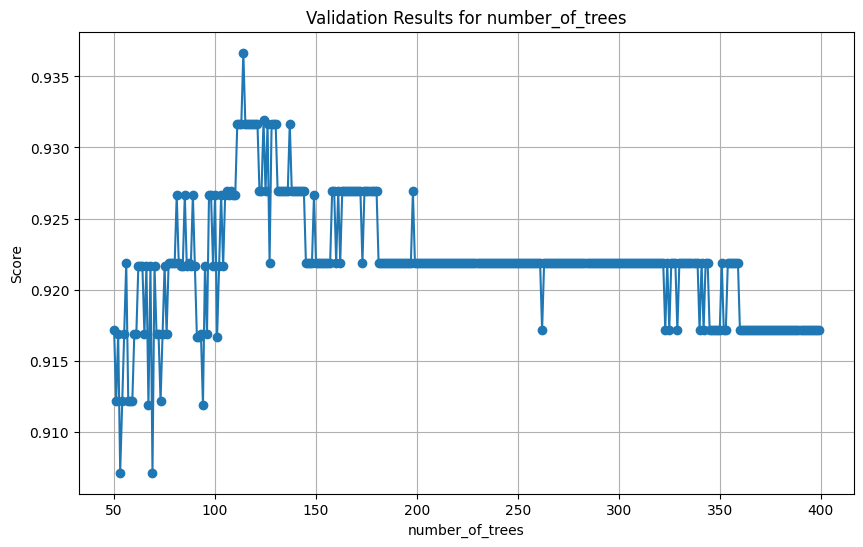

In [137]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [140]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

In [142]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=3),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9,
                                           1]},
             scoring='accuracy')

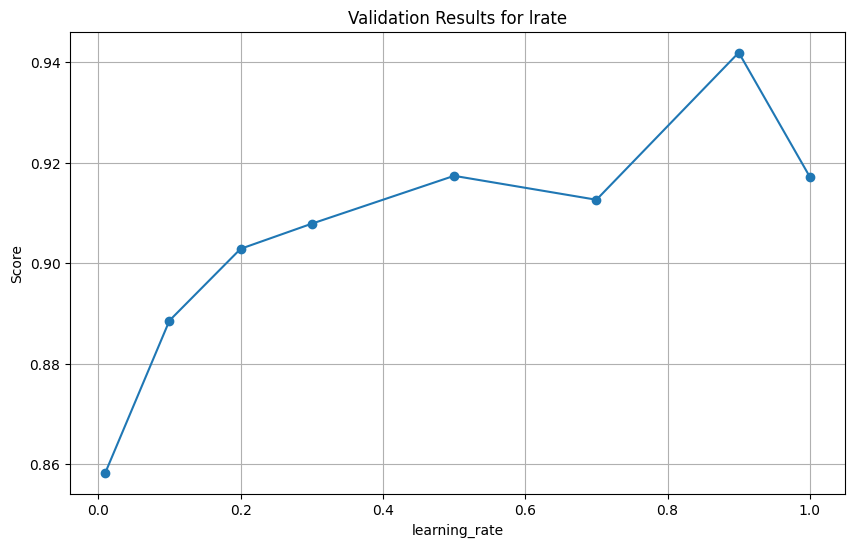

In [143]:
Learning_rate = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(Learning_rate, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Validation Results for lrate')
plt.grid(True)
plt.show()

In [144]:
param_grid = {
    'learning_rate': [0.8, 0.9, 1],
    'n_estimators': [114]}

In [146]:
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 1, 'n_estimators': 114}


In [147]:
weak_learner = DecisionTreeClassifier(max_depth=3)
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    algorithm="SAMME",
    n_estimators=114,
    learning_rate=1,
    random_state=42)

In [148]:
adaboost_clf.fit(X_train, y_train)
y_pred_ada=adaboost_clf.predict(X_test)
adareport = classification_report(y_test, y_pred_ada)
print(adareport)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.81      0.81      0.81        16
           2       1.00      1.00      1.00        16

    accuracy                           0.88        52
   macro avg       0.89      0.89      0.89        52
weighted avg       0.88      0.88      0.88        52



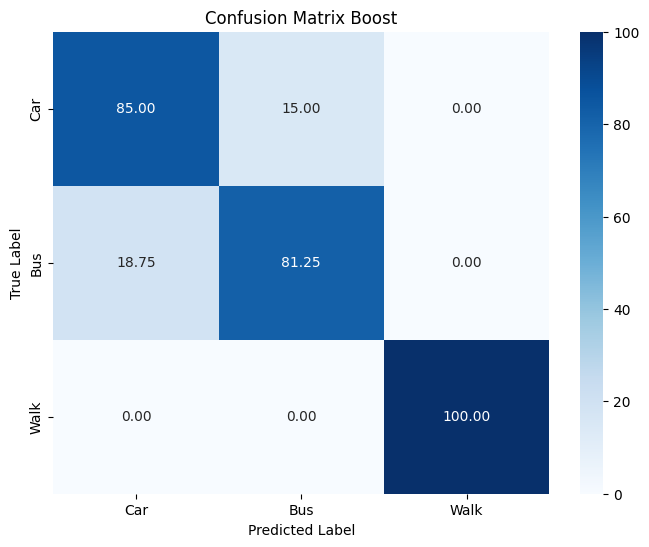

In [149]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBoost

In [153]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [154]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [155]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

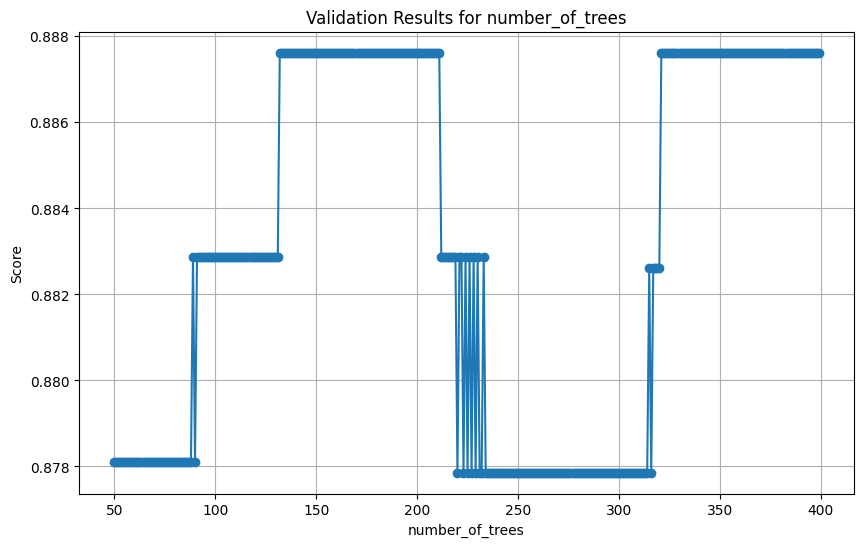

In [156]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [157]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

In [158]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

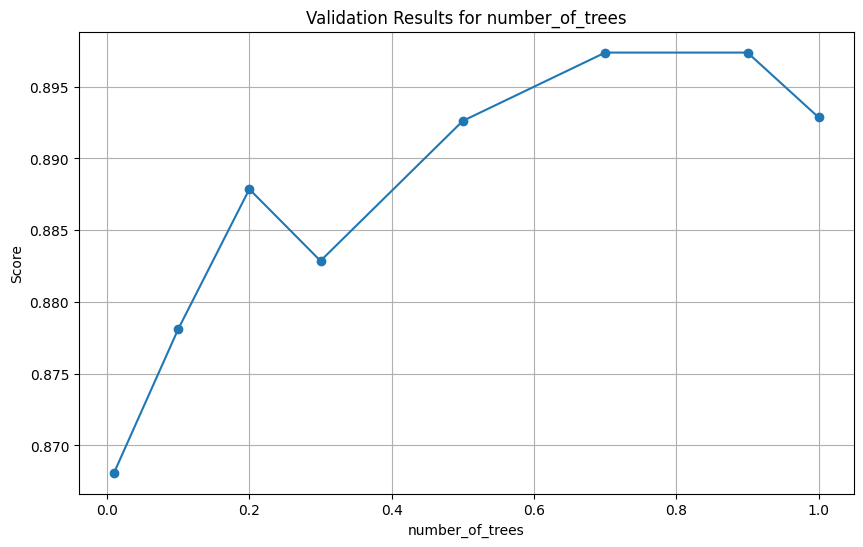

In [160]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [176]:
param_grid = {
    'n_estimators': list(range(125, 211)),
    'learning_rate': [0.7,0.8, 0.9]
}

In [177]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.7, 'n_estimators': 172}


In [178]:
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.7,
    n_estimators=172
)

In [179]:
xgb_classifier.fit(X_train, y_train)
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.81      0.81      0.81        16
           2       1.00      0.94      0.97        16

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.89        52
weighted avg       0.89      0.88      0.89        52



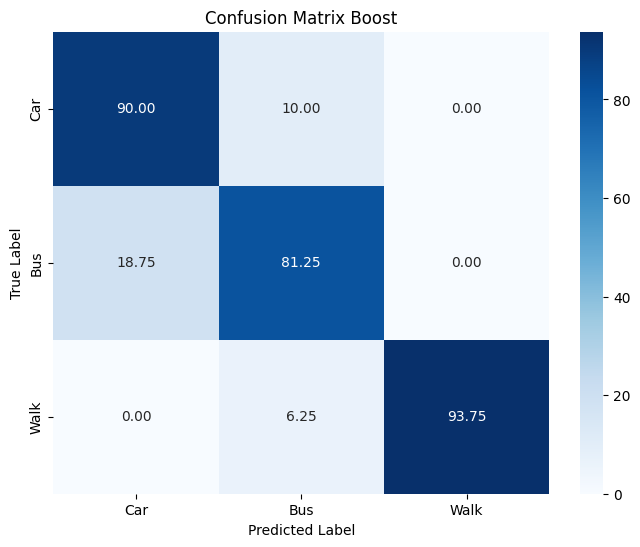

In [180]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LIGHTGBM

In [188]:
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

In [189]:
lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    verbosity=0,
    random_state=42
)

In [190]:
param_grid = {
    'n_estimators': list(range(50, 401)),
}

In [191]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=10,
             estimator=LGBMClassifier(num_class=3, objective='multiclass',
                                      random_state=42, verbosity=0),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60, 61, 62, 63, 64, 65, 66, 67,
                                          68, 69, 70, 71, 72, 73, 74, 75, 76,
                                          77, 78, 79, ...]},
             scoring='accuracy')

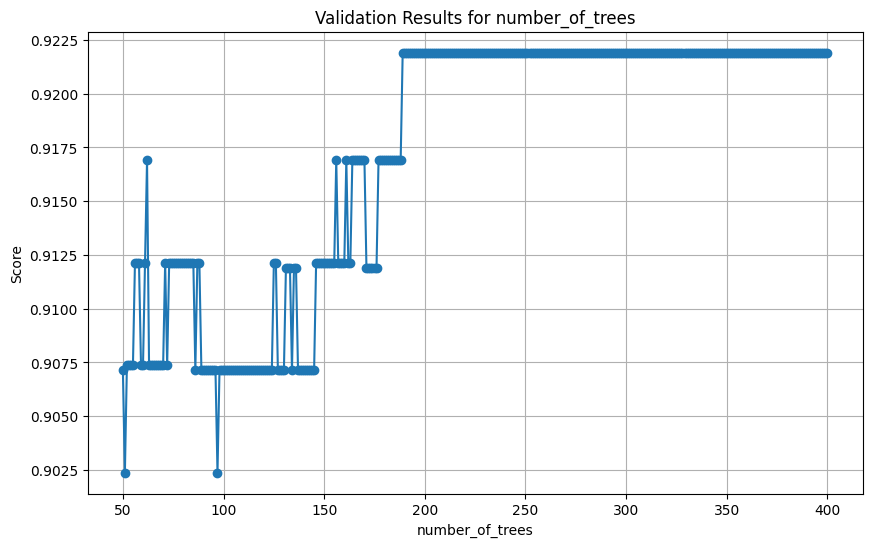

In [192]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [194]:
param_grid = {
     'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

In [195]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=10,
             estimator=LGBMClassifier(num_class=3, objective='multiclass',
                                      random_state=42, verbosity=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9,
                                           1]},
             scoring='accuracy')

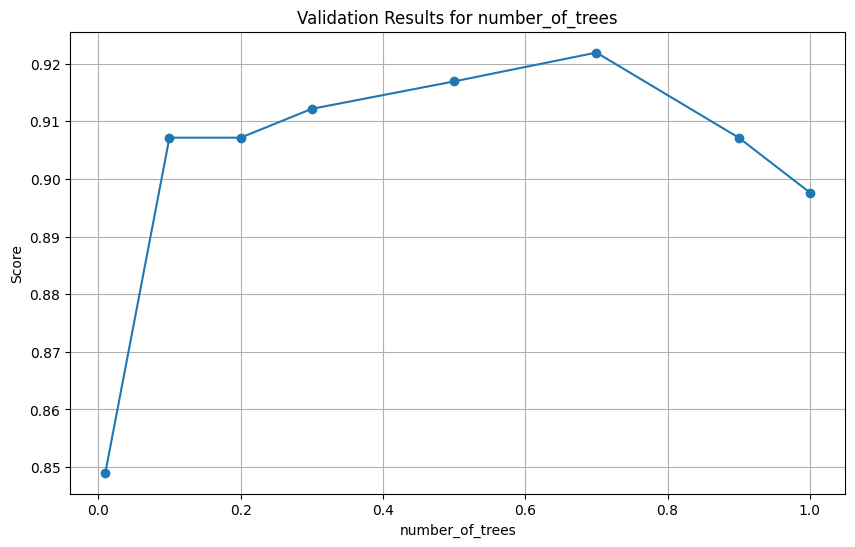

In [196]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [198]:
param_grid = {
     'learning_rate': [0.5, 0.6, 0.7],
     'n_estimators': list(range(201, 251))}

In [199]:
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [203]:
lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    random_state=42,
    learning_rate=0.7,
    n_estimators=201
)

In [204]:
lgb_classifier.fit(X_train, y_train)
y_pred_test = lgb_classifier.predict(X_test)
lgbreport = classification_report(y_test, y_pred_test)
print(lgbreport)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 16
[LightGBM] [Info] Start training from score -0.940983
[LightGBM] [Info] Start training from score -1.164127
[LightGBM] [Info] Start training from score -1.212136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

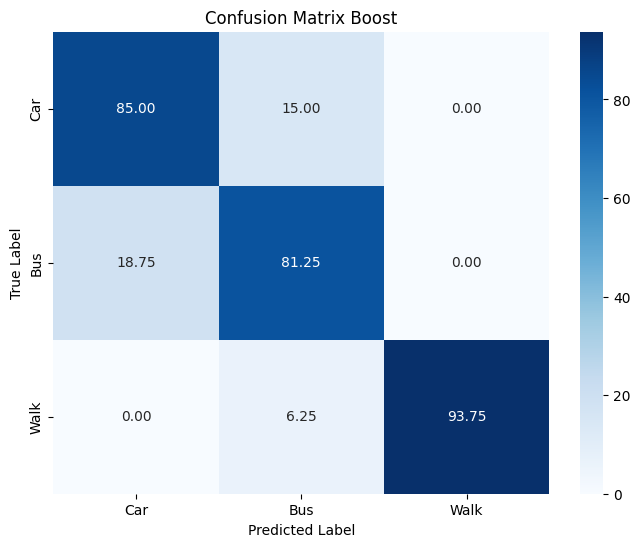

In [205]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN

In [227]:
knn_classifier = KNeighborsClassifier()

In [228]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [229]:
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

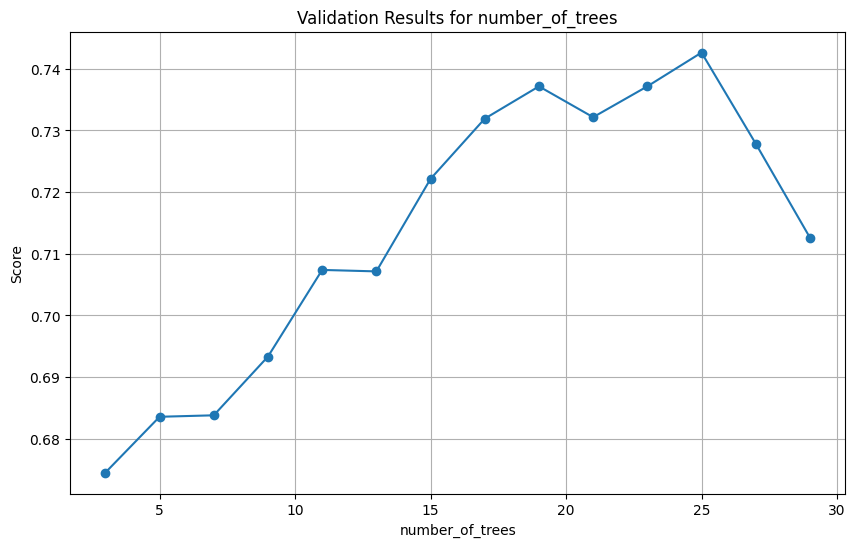

In [230]:
number_of_trees = grid_search.cv_results_['param_n_neighbors']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [231]:
param_grid = {
    'n_neighbors': [19, 21, 23, 25],
    'p': [1, 2]}

In [232]:
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [19, 21, 23, 25], 'p': [1, 2]},
             scoring='accuracy')

In [233]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 25, 'p': 2}


In [234]:
knn_classifier = KNeighborsClassifier(n_neighbors=25, p=2)
knn_classifier.fit(X_train, y_train)
y_pred_test = knn_classifier.predict(X_test)
knnreport = classification_report(y_test, y_pred_test)
print(knnreport)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.62      0.81      0.70        16
           2       0.92      0.75      0.83        16

    accuracy                           0.75        52
   macro avg       0.77      0.75      0.76        52
weighted avg       0.77      0.75      0.75        52



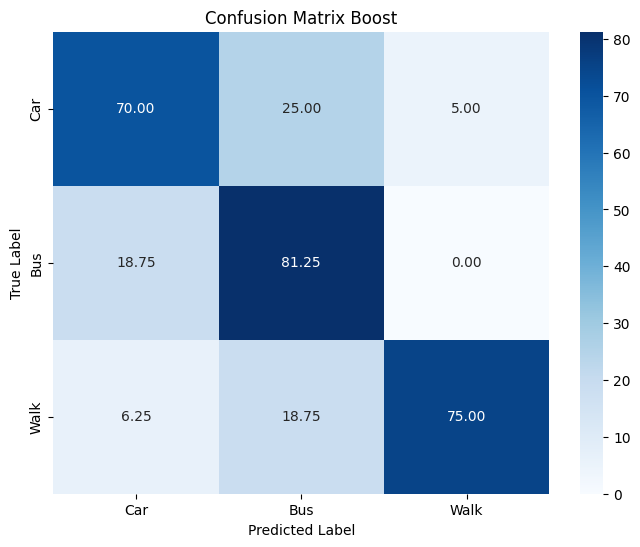

In [235]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Stacking

In [236]:
base_model1 = RandomForestClassifier(random_state=42, max_features=15, n_estimators=94)
base_model2  = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    algorithm="SAMME",
    n_estimators=114,
    learning_rate=1,
    random_state=42)
base_model3 = xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.7,
    n_estimators=172
)

In [237]:
meta_model = LogisticRegression(C=100, max_iter=100, solver='liblinear', random_state=42)

In [238]:
stacking_cv_classifier = StackingCVClassifier(
    classifiers=[base_model1, base_model2, base_model3],
    meta_classifier=meta_model,
    cv=10)

In [239]:
stacking_cv_classifier.fit(X_train, y_train)
y_pred_test = stacking_cv_classifier.predict(X_test)
stackreport = classification_report(y_test, y_pred_test)
print(stackreport)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.86      0.75      0.80        16
           2       1.00      1.00      1.00        16

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.89        52
weighted avg       0.89      0.88      0.88        52



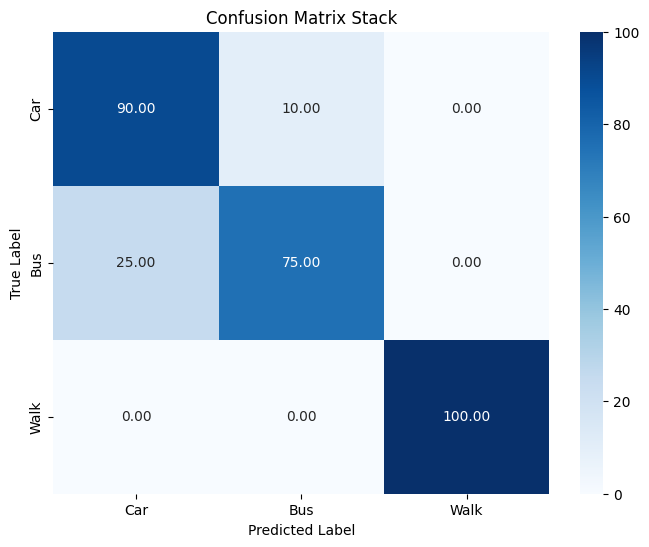

In [241]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_ada) / conf_matrix_ada.sum(axis=1)
conf_matrix_percentages_ada = (conf_matrix_ada.T / conf_matrix_ada.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_ada, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Stack')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()